In [1]:
import sys
import numpy as np
from numpy.random import default_rng
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras.models import load_model
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import train_test_split
sys.path.append('..')
plt.style.use('dark_background')
from utils.visuals import *
from utils.data_loader import *
from utils.simpleFunctions import *
from utils.unet import *

In [2]:
data_path = "../data/processed/0_dB_fan.h5"

In [3]:
X = load_normal_data(data_path)
X_train, X_val = train_test_split(X, test_size=0.1, random_state=42)

print("Validation data shape:", X_val.shape)

Validation data shape: (3260, 64, 96, 1)


In [4]:
input_shape = X_train.shape[1:]
model = build_unet_v2(input_shape, "mse", dropout_rate=0.3, l2_reg=1e-5)

train_dataset = create_dataset(X_train, batch_size=64)
val_dataset = create_dataset(X_val, batch_size=64, shuffle=False)

callbacks = get_training_callbacks("../results/models/fan/0dB/0dB_unet_v2_mse_best64.h5")

history = model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=callbacks)

Epoch 1/50
459/459 [==============================] - ETA: 0s - loss: 0.0057   
Epoch 1: val_loss improved from inf to 0.01210, saving model to ../results/models/fan/0dB\0dB_unet_v2_mse_best64.h5
459/459 [==============================] - 45s 88ms/step - loss: 0.0057 - val_loss: 0.0121 - lr: 0.0010
Epoch 2/50
458/459 [============================>.] - ETA: 0s - loss: 0.0026 
Epoch 2: val_loss improved from 0.01210 to 0.00224, saving model to ../results/models/fan/0dB\0dB_unet_v2_mse_best64.h5
459/459 [==============================] - 41s 89ms/step - loss: 0.0026 - val_loss: 0.0022 - lr: 0.0010
Epoch 3/50
458/459 [============================>.] - ETA: 0s - loss: 0.0013 
Epoch 3: val_loss improved from 0.00224 to 0.00139, saving model to ../results/models/fan/0dB\0dB_unet_v2_mse_best64.h5
459/459 [==============================] - 40s 87ms/step - loss: 0.0013 - val_loss: 0.0014 - lr: 0.0010
Epoch 4/50
458/459 [============================>.] - ETA: 0s - loss: 6.7597e-04 
Epoch 4: val_l

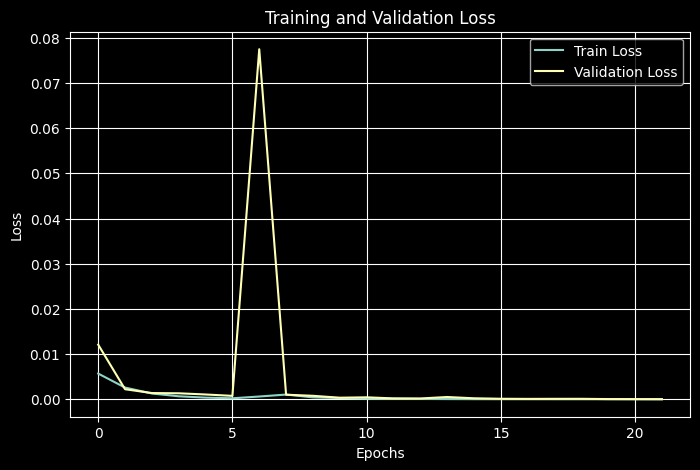

In [5]:
plot_loss_curve(history)

## ERROR BASED EVALUATION

In [12]:
# data_path = "../data/processed/6_dB_pump.h5"

# model = load_model("../results/models/slider/-6dB/-6dB_unet_v2_bce_best32.h5")

In [6]:
eval_dataset, X_eval_bal, y_eval_bal, filenames_bal = prepare_balanced_eval_dataset(data_path)

Evaluation data shape: (23600, 64, 96, 1)
Balanced label distribution: Counter({0: 11800, 1: 11800})
Full label distribution: Counter({0: 32600, 1: 11800})


In [7]:
X_pred = model.predict(eval_dataset, verbose=1)
errors_bce = compute_bce_batchwise(X_eval_bal, X_pred)
errors_mse = compute_mse_batchwise(X_eval_bal, X_pred)

369/369 [==============================] - 9s 22ms/step


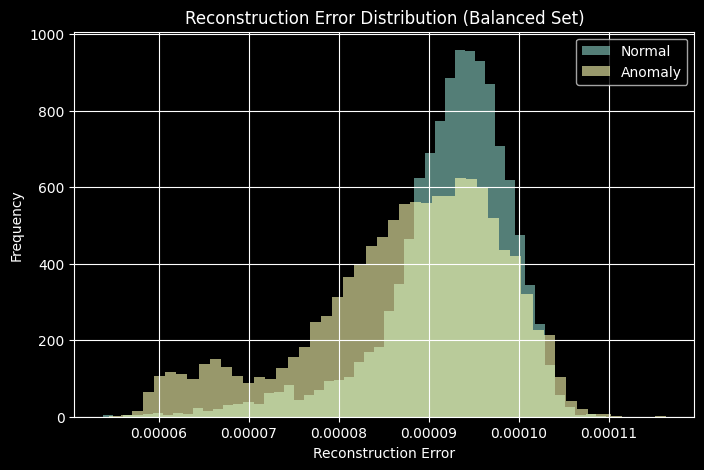

In [8]:
plot_error_histogram(errors_mse, y_eval_bal)

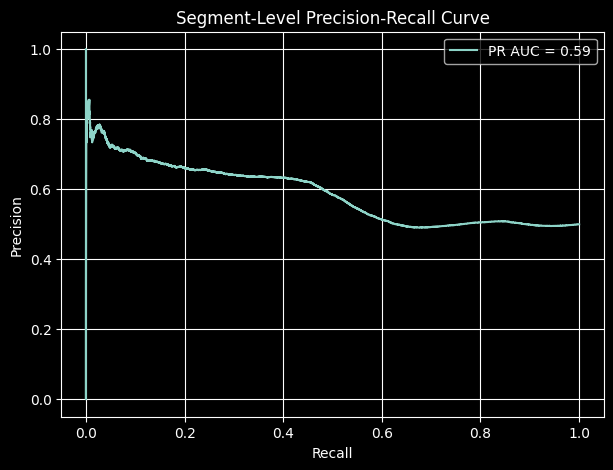

In [9]:
auc_segment = plot_segment_level_pr_curve(errors_bce, y_eval_bal)

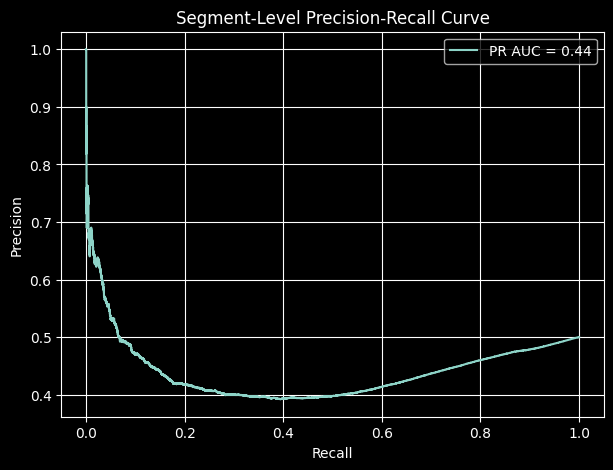

In [10]:
auc_segment = plot_segment_level_pr_curve(errors_mse, y_eval_bal)

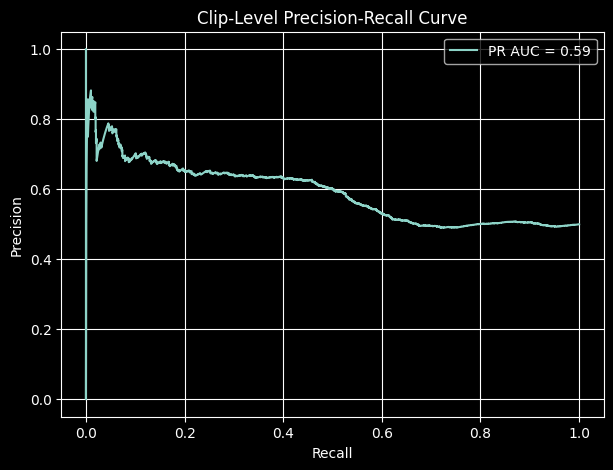

In [11]:
auc_clip = plot_clip_level_pr_curve(errors_bce, y_eval_bal, filenames_bal)

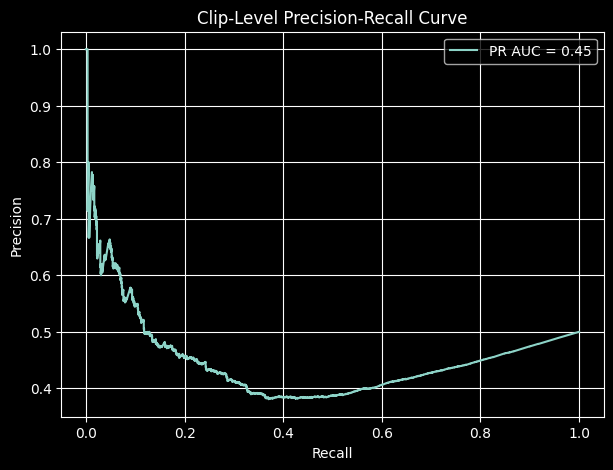

In [12]:
auc_clip = plot_clip_level_pr_curve(errors_mse, y_eval_bal, filenames_bal)

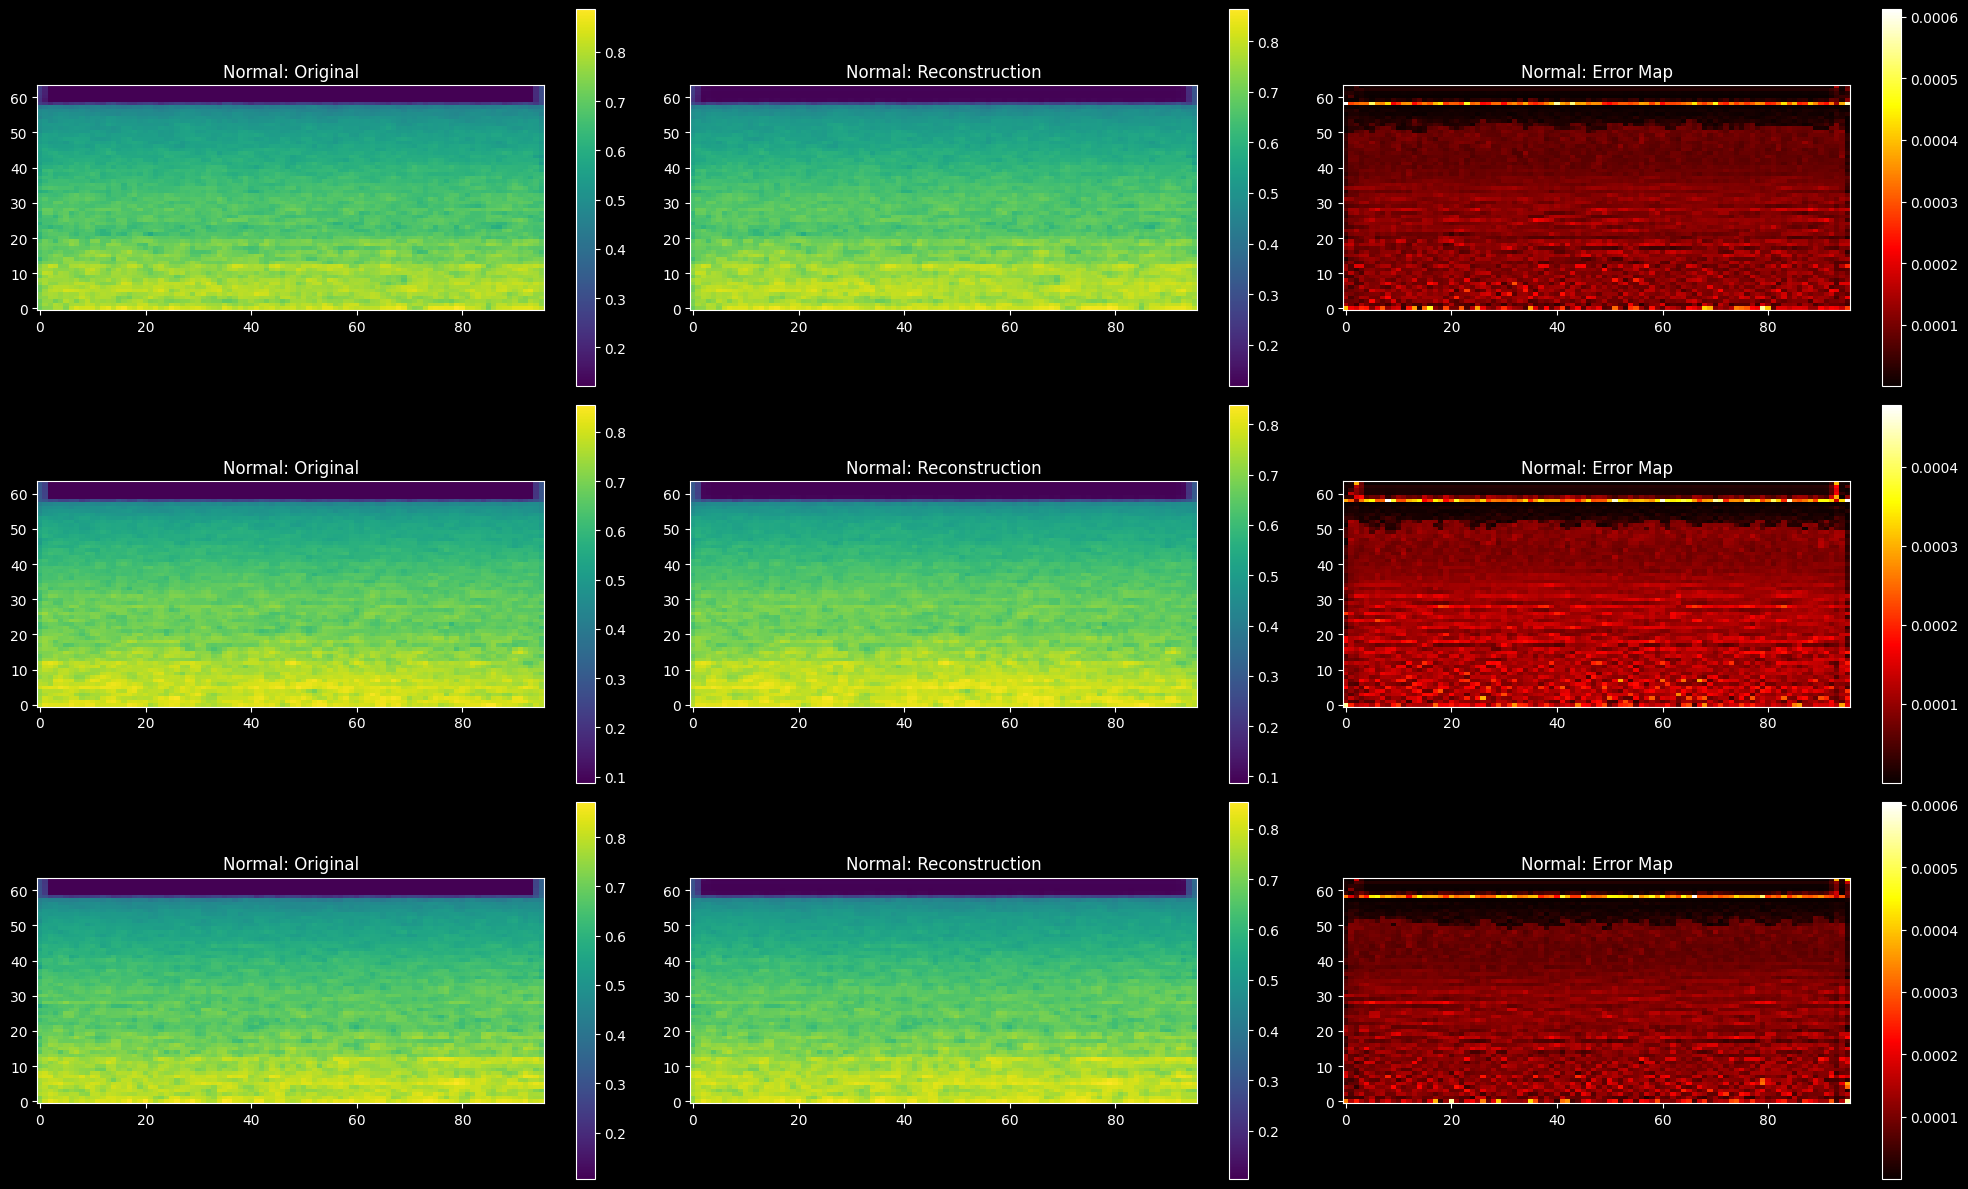

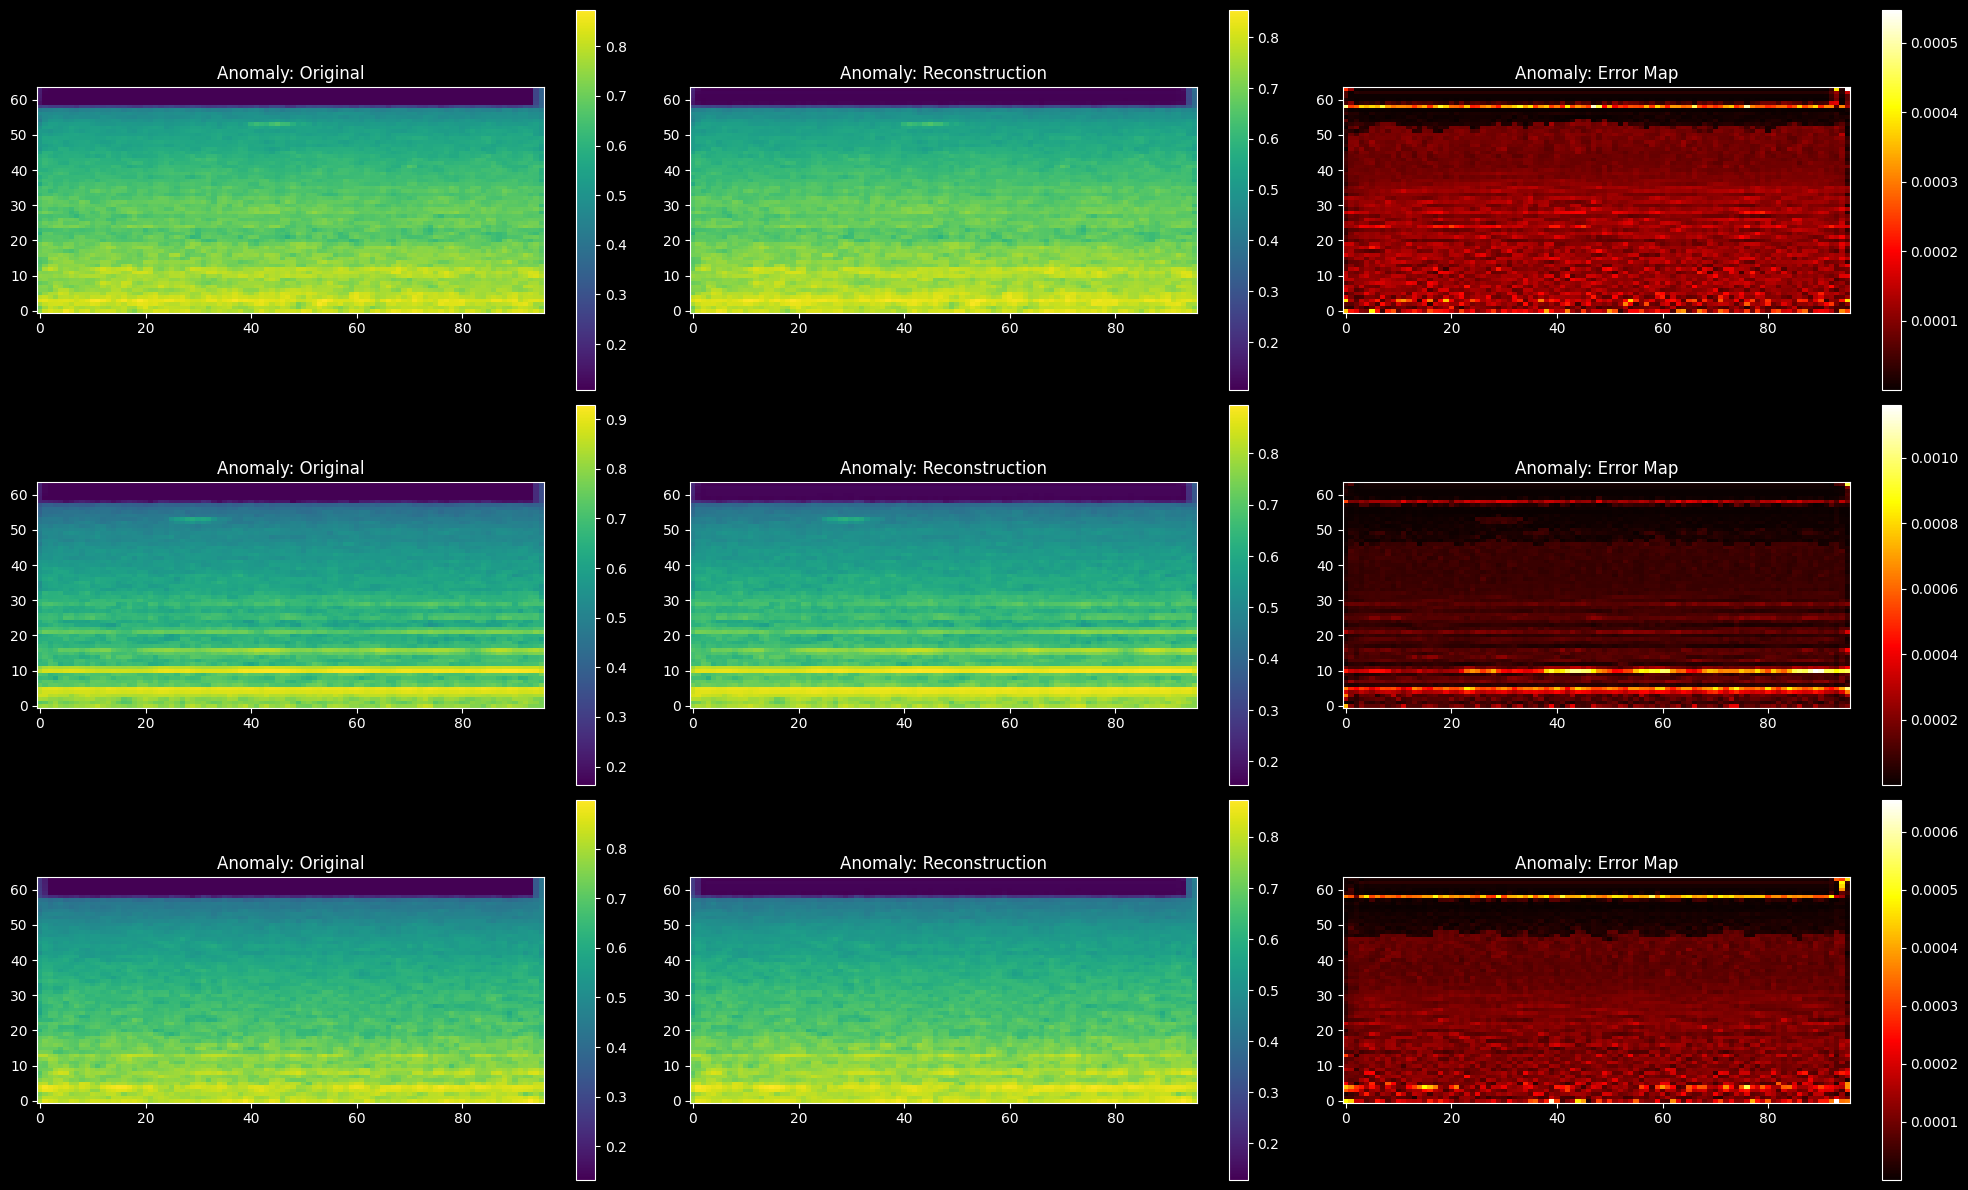

In [26]:
plot_error_maps(X_eval_bal, X_pred, y_eval_bal, 3)